                            Shakil Ahmed
                            reg - 2017331024

In [231]:
import numpy as np
import matplotlib.pyplot as plt
import math

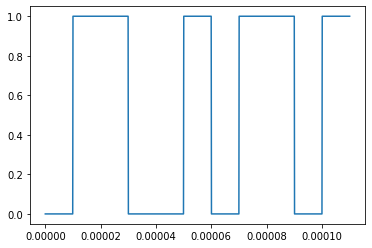

In [232]:
bits = np.array([0,1,1,0,0,1,0,1,1,0,1])
Time = 10e-6
bit_rate = 1/Time
Fs = 4*bit_rate
T = np.linspace(0,Time,100)
# print(np.ones(len(T)))
x = np.array([])
for i  in range(len(bits)):
    temp = bits[i]*np.ones(len(T))
    x=np.append(x,temp)
t = np.linspace(0,len(bits)*Time,len(x))

plt.plot(t,x)
plt.show()

In [233]:
data =[]
counter=0
for i in range(len(t)):
    if t[i]*bit_rate > counter:
#         print(counter,t[i],t[i]*bit_rate)
        counter=counter+1
        data.append(int(x[i]))
        
print(data)

[0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1]


                Block Coding(mB/nB Coding)
                 (replaces each  𝑚−𝑏𝑖𝑡  group with an  𝑛−𝑏𝑖𝑡  group.)

In [234]:
mB = 4
nB = 5

mapped_code={
    #encoding map
    "0000":"11110",
    "0001":"01001",
    "0010":"10100",
    "0011":"10101",
    "0100":"01010",
    "0101":"01011",
    "0110":"01110",
    "0111":"01111",
    "1000":"10010",
    "1001":"10011",
    "1010":"10110",
    "1011":"10111",
    "1100":"11010",
    "1101":"11011",
    "1110":"11100",
    "1111":"11101",
    #decoding map
    "11110": "0000",
    "01001": "0001",
    "10100": "0010",
    "10101": "0011",
    "01010": "0100",
    "01011": "0101",
    "01110": "0110",
    "01111": "0111",
    "10010": "1000",
    "10011": "1001",
    "10110": "1010",
    "10111": "1011",
    "11010": "1100",
    "11011": "1101",
    "11100": "1110",
    "11101": "1111",
}

def get_Mapping_Codes(bits):
  return mapped_code["".join(map(str, bits))]
  

bits  =  sequence of bits to encode

In [235]:
def get_MB_NB_Encoding(bits, mB, nB):
    if len(bits) % mB != 0:
        extra_len = (((len(bits)// mB) + 1) * mB) - len(bits)
        extra = np.array(np.zeros(extra_len), dtype=int)
        bits = np.append(bits, extra)
  
    encoded_bits_str = ""
    for i in range(0, len(bits), mB):
        encoded_bits_str += get_Mapping_Codes(bits[i:i+mB])
  
    encoded_bits_list = list(encoded_bits_str)
    encoded_bits_map = map(int, encoded_bits_list)
    encoded_bits = np.array(list(encoded_bits_map))
    return encoded_bits

In [236]:
def get_NB_MB_Decoding(bits, mB, nB):
    if len(bits) % nB != 0:
        print("Invalid length, Decoding Not possible!")
        return
    decoded_bits_str = ""
    for i in range(0, len(bits), nB):
        decoded_bits_str += get_Mapping_Codes(bits[i:i+nB])
        
    decoded_bits_list = list(decoded_bits_str)
    decoded_bits_map = map(int, decoded_bits_list)
    decoded_bits = np.array(list(decoded_bits_map))
    return decoded_bits

4B/5B Encoding

In [237]:
bits = np.array([0,1,1,0,0,1,0,1,1,0,1])
bits = get_MB_NB_Encoding(bits,mB,nB)
print(bits)

[0 1 1 1 0 0 1 0 1 1 1 0 1 1 0]


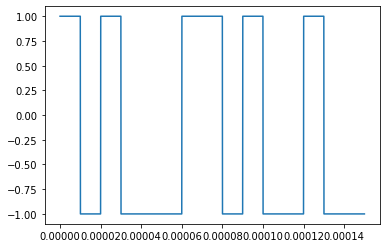

In [238]:
Time = 10e-6   
bit_rate = 1/Time  
Fs = 4*bit_rate    
N = len(bits)   
T = np.linspace(0,Time, mB * 100)

x = np.array([])
last_bit = 1
for i in range(N):
    if bits[i] == 1:
        temp = (-1) * last_bit * np.ones(len(T))
        last_bit = -last_bit
    else:
        temp = last_bit * np.ones(len(T))
    x = np.append(x, temp)
t = np.linspace(0,N*Time,len(x))

plt.plot(t, x)
plt.show()

In [239]:
result = []
counter = 0
last_bit = 1
for i in range(len(t)):
    if t[i]*bit_rate > counter:
        counter = counter + 1
        if x[i] != last_bit:
            result.append(1)
            last_bit=-last_bit
        else:
            result.append(0)

print(result)

[0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0]


4B/5B Decoding

In [240]:
decoded_output = get_NB_MB_Decoding(result,mB,nB)
print(decoded_output)

[0 1 1 0 0 1 0 1 1 0 1 0]
